# Case Study : Customer Churn Analysis for a Bank

### Introduction 

This project analyzes a bank customer dataset to understand the factors that influence customer churn. Using Python and Pandas, we explore customer demographics,account information, credit scores, tenure, and product usage to identify which groups are more likely to leave the bank. The goal of this analysis is to uncover important patterns and provide insights that can help reduce churn and improve customer retention strategies.



## Step 1 : Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2 : Load the Data

In [3]:
df = pd.read_csv(r"C:\Users\Yash\Downloads\Bank Customer Churn Prediction.csv")

In [4]:
print("Shape:", df.shape)

Shape: (10000, 12)


## Step 3: Exploratory Data Overview (EDO)

### Show first 5 row of all column

In [7]:
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Show last 5 row of all column

In [8]:
df.tail(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Display data types and non-null count of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Check null values column-wise

In [7]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

## Step 3: Data Cleaning

### To convert all columns names in lowercase and remove extra spaces

In [9]:
df.columns = df.columns.str.lower().str.strip()

In [10]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

### To drop customer_id columns because it is not required

In [11]:
df = df.drop(columns=['customer_id'])

In [10]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### To convert country and gender to category because Changing them to category type saves memory and makes analysis faster and cleaner.

In [11]:
df['country'] = df['country'].astype('category')
df['gender'] = df['gender'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      10000 non-null  int64   
 1   country           10000 non-null  category
 2   gender            10000 non-null  category
 3   age               10000 non-null  int64   
 4   tenure            10000 non-null  int64   
 5   balance           10000 non-null  float64 
 6   products_number   10000 non-null  int64   
 7   credit_card       10000 non-null  int64   
 8   active_member     10000 non-null  int64   
 9   estimated_salary  10000 non-null  float64 
 10  churn             10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


## Exploratory Data Analysis (EDA)

### Q1. How many customers churned vs stayed?

churn
0    7963
1    2037
Name: count, dtype: int64


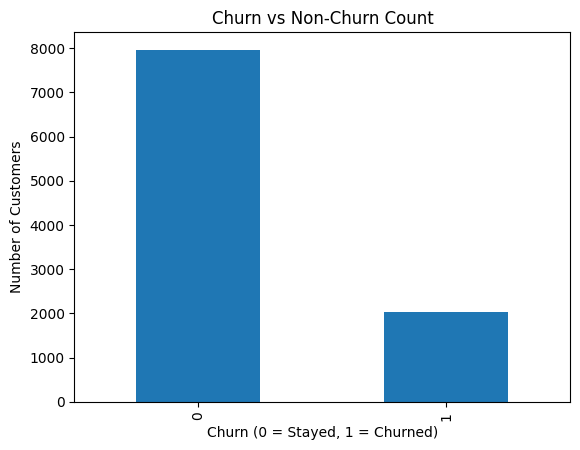

In [15]:
churn_count = df['churn'].value_counts()
print(churn_count)
churn_count.plot(kind='bar')
plt.title("Churn vs Non-Churn Count")
plt.xlabel("Churn (0 = Stayed, 1 = Churned)")
plt.ylabel("Number of Customers")
plt.show()


### Q2. Churn Rate Percentage

In [16]:
churn_percent = df['churn'].value_counts(normalize=True) * 100
print(churn_percent.round(2))


churn
0    79.63
1    20.37
Name: proportion, dtype: float64


### Q3. Churn Rate by Country

In [12]:
country_churn = df.groupby('country')['churn'].agg(['sum', 'count'])
country_churn['churn_rate'] = (country_churn['sum'] / country_churn['count']) * 100
print(country_churn)

         sum  count  churn_rate
country                        
France   810   5014   16.154767
Germany  814   2509   32.443204
Spain    413   2477   16.673395


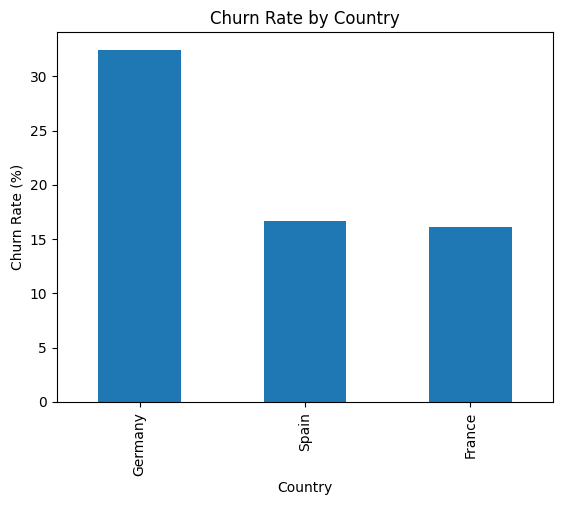

In [13]:
country_churn['churn_rate'].sort_values(ascending=False).plot(kind='bar')
plt.title("Churn Rate by Country")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Country")
plt.show()

### Q.4 How many customers churned for each number of products?

In [17]:
gender_churn_count = df.groupby('gender')['churn'].sum()
gender_churn_count


gender
Female    1139
Male       898
Name: churn, dtype: int64

### Q.5 What is the average credit score of churned vs non-churned customers?

In [18]:
df.groupby('churn')['credit_score'].mean()


churn
0    651.853196
1    645.351497
Name: credit_score, dtype: float64

### Q6. What is the total balance of churned customers?

In [19]:
df[df['churn'] == 1]['balance'].sum()

np.float64(185588094.63)

### Q7. Find the top 10 customers with the highest balance who churned AND were active members?

In [20]:
df[(df['churn'] == 1) & (df['active_member'] == 1)]\
    .sort_values('balance', ascending=False)\
    .head(10)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
6717,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
7353,596,France,Male,21,4,210433.08,2,0,1,197297.77,1
720,672,Spain,Female,56,2,209767.31,2,1,1,150694.42,1
8794,706,Spain,Female,29,1,209490.21,1,1,1,133267.69,1
6913,564,France,Female,36,7,206329.65,1,1,1,46632.87,1
4533,850,Spain,Male,39,6,206014.94,2,0,1,42774.84,1
9920,678,France,Female,49,3,204510.94,1,0,1,738.88,1
6271,747,France,Male,49,6,202904.64,1,1,1,17298.72,1


### Q8.Identify customers who churned despite having more than 2 products

In [21]:
df[(df['products_number'] > 2) & (df['churn'] == 1)]


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
30,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
88,646,France,Female,46,4,0.00,3,1,0,93251.42,1
...,...,...,...,...,...,...,...,...,...,...,...
9716,812,Germany,Male,39,5,115730.71,3,1,1,185599.34,1
9747,610,Germany,Female,69,5,86038.21,3,0,0,192743.06,1
9800,762,Spain,Female,35,3,119349.69,3,1,1,47114.18,1
9877,505,Germany,Female,33,3,106506.77,3,1,0,45445.78,1


### Q9.Find customers who have zero balance but still churned

In [23]:
df[(df['balance'] == 0) & (df['churn'] == 1)]


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
22,510,Spain,Female,38,4,0.0,1,1,0,118913.53,1
30,591,Spain,Female,39,3,0.0,3,1,0,140469.38,1
58,511,Spain,Female,66,4,0.0,1,1,0,1643.11,1
81,777,France,Female,32,2,0.0,1,1,0,136458.19,1
...,...,...,...,...,...,...,...,...,...,...,...
9784,527,France,Male,39,4,0.0,2,1,0,167183.07,1
9884,751,France,Female,48,4,0.0,1,0,1,30165.06,1
9898,589,France,Male,38,4,0.0,1,1,0,95483.48,1
9962,702,Spain,Male,44,9,0.0,1,0,0,59207.41,1


### Q10. Find customers who are both: active members = 0 AND credit card = 0

In [24]:
df[(df['active_member'] == 0) & (df['credit_card'] == 0)]


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
10,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
13,549,France,Female,25,5,0.00,2,0,0,190857.79,0
18,587,Spain,Male,45,6,0.00,1,0,0,158684.81,0
27,571,France,Male,44,9,0.00,2,0,0,38433.35,0
...,...,...,...,...,...,...,...,...,...,...,...
9968,512,Germany,Female,40,8,153537.57,2,0,0,23101.13,0
9971,833,France,Female,34,3,144751.81,1,0,0,166472.81,0
9980,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0
9983,613,France,Male,40,4,0.00,1,0,0,151325.24,0


### Q11. Top 5 customers with the highest account balance who churned

In [27]:
top5_high_balance_churn = df[df['churn'] == 1] \
    .sort_values('balance', ascending=False) \
    .head(5)

top5_high_balance_churn


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
8733,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
6717,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
138,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1


### Q13. Churn count by tenure

tenure
0      95
1     232
2     201
3     213
4     203
5     209
6     196
7     177
8     197
9     213
10    101
Name: churn, dtype: int64


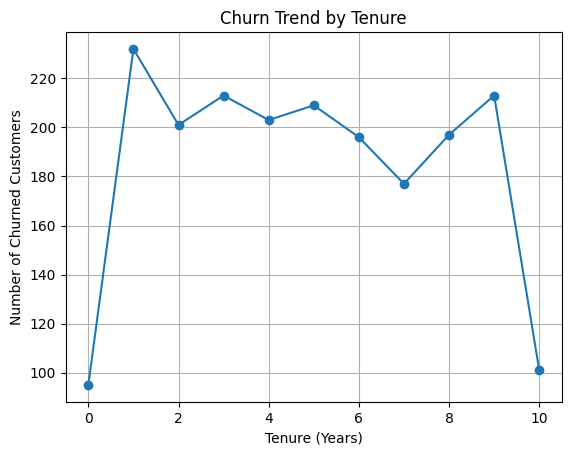

In [7]:
tenure_churn = df.groupby('tenure')['churn'].sum()
print(tenure_churn)
tenure_churn.plot(kind='line', marker='o')
plt.title("Churn Trend by Tenure")
plt.ylabel("Number of Churned Customers")
plt.xlabel("Tenure (Years)")
plt.grid(True)
plt.show()



### Q14. Churn Count by Credit Score Range

In [8]:
df['credit_score_range'] = pd.cut(
    df['credit_score'],
    bins=[300, 500, 650, 750, 900],
    labels=['300-500', '501-650', '651-750', '751-900']
)


C:\Users\Yash\AppData\Local\Temp\ipykernel_3720\3984435821.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_churn = df.groupby('credit_score_range')['churn'].sum()


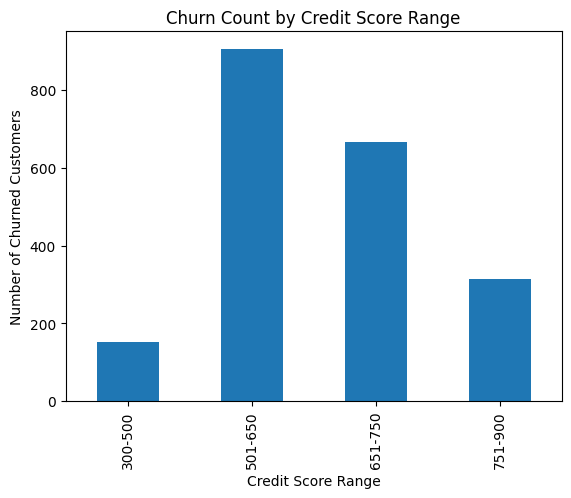

In [10]:
credit_churn = df.groupby('credit_score_range')['churn'].sum()
credit_churn
credit_churn.plot(kind='bar')
plt.title("Churn Count by Credit Score Range")
plt.ylabel("Number of Churned Customers")
plt.xlabel("Credit Score Range")
plt.show()


### Q15. Gender distribution among churned customers

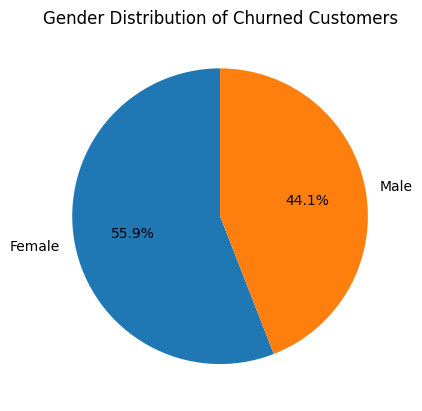

In [13]:
churned = df[df['churn'] == 1]
gender_counts = churned['gender'].value_counts()
gender_counts
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution of Churned Customers")
plt.ylabel("")  # Removes unnecessary label
plt.show()

### Q16. Top 5 youngest customers who churned

In [14]:
youngest_churned = df[df['churn'] == 1].sort_values('age').head(5)
youngest_churned

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_score_range
9572,15641688,644,Spain,Male,18,7,0.00,1,0,1,59645.24,1,501-650
2141,15758372,674,France,Male,18,7,0.00,2,1,1,55753.12,1,651-750
4218,15782418,589,Germany,Female,19,9,83495.11,1,1,1,143022.31,1,501-650
2945,15776348,835,Germany,Male,20,4,124365.42,1,0,0,180197.74,1,751-900
1685,15713826,613,Germany,Female,20,0,117356.19,1,0,0,113557.70,1,501-650


### Q17. Customers who have the same credit score but different churn status


In [16]:
same_score_opposite_churn = df.groupby('credit_score') \
    .filter(lambda x: x['churn'].nunique() > 1)

same_score_opposite_churn.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_score_range
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,501-650
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,501-650
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,501-650
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,651-750
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,751-900
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,501-650
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,751-900
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,501-650
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,651-750
10,15767821,528,France,Male,31,6,102016.72,2,0,0,80181.12,0,501-650


### Q18. Customers who have the same balance but different churn status

In [4]:
same_balance_diff_churn = df.groupby('balance') \
    .filter(lambda x: x['churn'].nunique() > 1)

same_balance_diff_churn.head(10)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
13,15691483,549,France,Female,25,5,0.0,2,0,0,190857.79,0
14,15600882,635,Spain,Female,35,7,0.0,2,1,1,65951.65,0
17,15788218,549,Spain,Female,24,9,0.0,2,1,1,14406.41,0
18,15661507,587,Spain,Male,45,6,0.0,1,0,0,158684.81,0
19,15568982,726,France,Female,24,6,0.0,2,1,1,54724.03,0


### Q19. Long-term customers (tenure > 8 years) who churned

In [5]:
long_term_churn = df[(df['tenure'] > 8) & (df['churn'] == 1)]
long_term_churn

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
46,15602280,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
47,15771573,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1
109,15744689,479,Germany,Male,35,9,92833.89,1,1,0,99449.86,1
114,15609618,721,Germany,Male,28,9,154475.54,2,0,1,101300.94,1
125,15627360,432,France,Male,42,9,152603.45,1,1,0,110265.24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9879,15669414,486,Germany,Male,62,9,118356.89,2,1,0,168034.83,1
9934,15774586,692,Germany,Female,43,10,118588.83,1,1,1,161241.65,1
9956,15707861,520,France,Female,46,10,85216.61,1,1,0,117369.52,1
9960,15681026,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1


### Q20. Top 10 highest balance customers who did NOT churn

In [7]:
top10_high_balance_loyal = df[df['churn'] == 0] \
    .sort_values('balance', ascending=False) \
    .head(10)

top10_high_balance_loyal

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
3588,15571958,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
1067,15599131,650,Germany,Male,26,4,214346.96,2,1,0,128815.33,0
1533,15769818,850,France,Female,37,3,212778.20,1,0,1,69372.88,0
3920,15620268,634,Germany,Male,43,3,212696.32,1,1,0,115268.86,0
2709,15780212,592,France,Male,37,4,212692.97,1,0,0,176395.02,0
8702,15690589,541,France,Male,37,9,212314.03,1,0,1,148814.54,0
3150,15795298,573,Germany,Female,35,9,206868.78,2,0,1,102986.15,0
8982,15627971,504,France,Female,32,8,206663.75,1,0,0,16281.94,0
4436,15664498,508,France,Male,26,7,205962.00,1,1,0,156424.40,0
7887,15745433,716,Germany,Female,30,2,205770.78,2,0,0,65464.66,0


### Q21. Top 10 oldest customers who churned

In [9]:
oldest_churned = df[df['churn'] == 1] \
    .sort_values('age', ascending=False) \
    .head(10)

oldest_churned

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
3531,15653251,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
3110,15707596,546,Germany,Female,74,8,114888.74,2,1,1,66732.63,1
1410,15710164,523,France,Female,73,7,0.00,2,0,0,130883.90,1
9555,15655360,782,Germany,Female,72,5,148666.99,1,1,0,2605.65,1
2553,15732270,727,Spain,Male,71,8,0.00,1,1,1,198446.91,1
3317,15575119,779,France,Male,71,3,0.00,2,1,1,146895.36,1
7499,15790113,609,Germany,Female,71,6,113317.10,1,1,0,108258.22,1
7058,15671769,624,France,Female,71,4,170252.05,3,1,1,73679.59,1
6581,15598744,576,Germany,Female,71,6,140273.47,1,1,1,193135.25,1
5664,15661723,667,Spain,Male,71,4,137260.78,1,0,1,94433.08,1


### Q22. Customers with zero balance but having a credit card

In [10]:
zero_balance_creditcard = df[(df['balance'] == 0) & (df['credit_card'] == 1)]
zero_balance_creditcard

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
14,15600882,635,Spain,Female,35,7,0.0,2,1,1,65951.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9977,15579969,683,France,Female,32,9,0.0,2,1,1,24991.92,0
9988,15589329,775,France,Male,30,4,0.0,2,1,0,49337.84,0
9989,15605622,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,15657105,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0


### Q23. Customers with the maximum number of products


In [12]:
max_products = df['products_number'].max()
customers_max_products = df[df['products_number'] == max_products]

customers_max_products.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,15703793,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,15610383,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,15670374,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,15625824,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,15605279,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,15664754,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,15603851,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,15791700,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,15783615,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1


### Q24. Customers below age 25 with high credit score (>750)

In [13]:
young_high_score = df[(df['age'] < 25) & (df['credit_score'] > 750)]
young_high_score

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
129,15591607,770,France,Male,24,9,101827.07,1,1,0,167256.35,0
233,15723886,767,Germany,Male,20,3,119714.25,2,0,1,150135.38,0
284,15708608,799,France,Female,22,8,174185.98,2,0,1,192633.85,0
746,15787619,844,France,Male,18,2,160980.03,1,0,0,145936.28,0
929,15590876,764,France,Female,24,7,106234.02,1,0,0,115676.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9160,15753679,778,France,Male,24,4,0.00,2,1,1,162809.20,0
9246,15682523,762,France,Male,20,1,139432.55,1,1,1,85606.83,0
9501,15634146,835,Germany,Male,18,2,142872.36,1,1,1,117632.63,0
9699,15570145,763,France,Female,23,2,0.00,2,1,0,153983.99,0


### Q25. Top 10 lowest credit score customers who did NOT churn

In [14]:
lowest_score_loyal = df[df['churn'] == 0] \
    .sort_values('credit_score') \
    .head(10)

lowest_score_loyal

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5357,15691396,405,Germany,Male,31,5,133299.67,2,1,1,72950.14,0
8971,15583849,408,France,Male,40,3,0.00,2,0,0,124874.23,0
4659,15572762,410,Germany,Female,50,2,102278.79,2,1,0,89822.48,0
5488,15628155,410,France,Female,35,7,117183.74,1,1,1,109733.73,0
3242,15729908,411,France,Female,36,10,0.00,1,0,0,120694.35,0
29,15656300,411,France,Male,29,0,59697.17,2,1,1,53483.21,0
4840,15691647,411,France,Female,35,2,0.00,2,1,1,93825.78,0
9171,15660475,411,France,Female,54,9,0.00,1,0,1,76621.49,0
8826,15570194,412,France,Male,29,5,0.00,2,0,0,12510.53,0
99,15633059,413,France,Male,34,9,0.00,2,0,0,6534.18,0


### Q26. Identify the Top 10 Most Valuable Customers Who Churned

In [15]:
df['value_score'] = df['balance'] * 0.5 + df['estimated_salary'] * 0.3 + df['products_number'] * 10000

In [16]:
top10_value_churned = df[df['churn'] == 1] \
    .sort_values('value_score', ascending=False) \
    .head(10)

top10_value_churned

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,value_score
7353,15736420,596,France,Male,21,4,210433.08,2,0,1,197297.77,1,184405.871
2092,15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1,179765.245
413,15801559,693,Germany,Female,41,9,181461.48,3,1,1,187929.43,1,177109.569
8683,15599329,697,France,Female,49,7,195238.29,4,0,1,131083.56,1,176944.213
5915,15725665,679,France,Male,47,10,198546.10,2,1,0,191198.92,1,176632.726
3280,15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1,173583.277
520,15671256,850,France,Female,35,1,211774.31,1,1,0,188574.12,1,172459.391
8027,15769412,684,Spain,Male,39,4,207034.96,2,0,0,157694.76,1,170825.908
720,15721658,672,Spain,Female,56,2,209767.31,2,1,1,150694.42,1,170091.981
3457,15713370,657,Spain,Male,36,8,188241.05,2,0,0,183058.51,1,169038.078


## Conclusion


The churn analysis revealed that certain customer groups—such as low product users, younger customers, and inactive members—are more likely to leave the bank. High-value and long-term customers generally remain loyal, but some exceptions 
show potential service or engagement issues. The insights from multiple unique cases highlight the need for targeted retention strategies to reduce churn and 
strengthen customer relationships.